In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
data = pd.read_csv('넙치.csv')
data['ds'] = pd.to_datetime(data['기간'])  # 'ds' 컬럼을 날짜 형식으로 변환
data.rename(columns={'단가': 'y'}, inplace=True)  # 종속 변수 컬럼 이름을 'y'로 변경

In [3]:
model1 = Prophet(seasonality_prior_scale=1)
model1.fit(data)

11:19:29 - cmdstanpy - INFO - Chain [1] start processing
11:19:30 - cmdstanpy - INFO - Chain [1] done processing


In [4]:
future = model1.make_future_dataframe(periods=12, freq='M')  # 향후 12개월의 날짜 생성
forecast = model1.predict(future)

In [5]:
forecast['yhat'] = forecast['yhat'].apply(lambda x: max(0, x))

In [6]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
25,2023-02-28,12803.613436,7712.149648,18288.636071
26,2023-03-31,6050.577223,497.154776,11277.909104
27,2023-04-30,2977.256135,-2620.108630,8394.629197
28,2023-05-31,4932.876101,-510.818225,10039.291688
29,2023-06-30,43395.195222,38294.227814,48782.710099
30,2023-07-31,33346.734327,27905.403120,37983.525476
31,2023-08-31,22025.097730,16677.776716,27181.053921
32,2023-09-30,0.000000,-32569.919885,-22126.066516
33,2023-10-31,29394.546852,23805.717195,34643.502890
34,2023-11-30,40840.707547,35459.307517,46557.576401


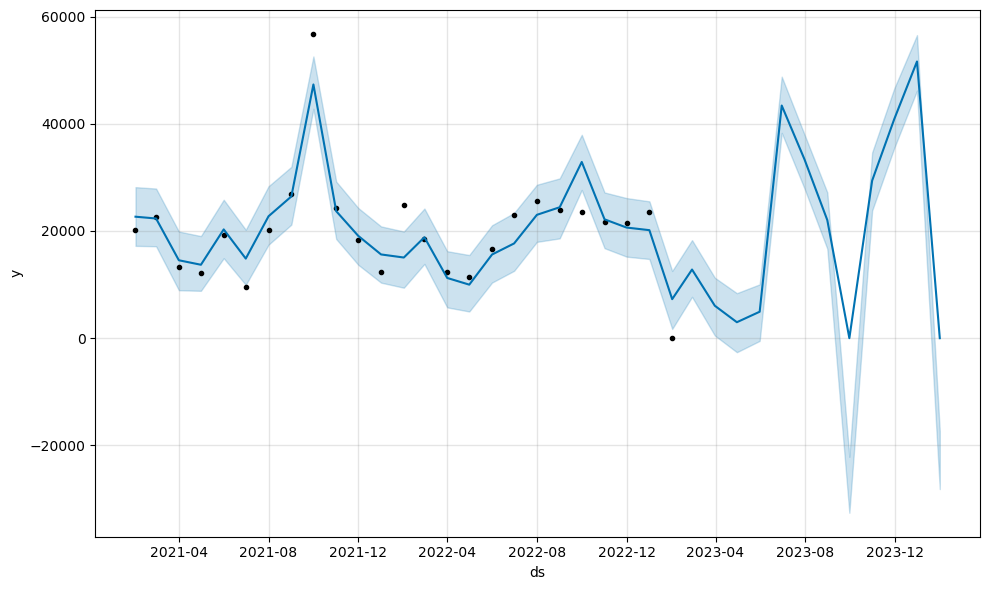

In [7]:
fig1 = model1.plot(forecast)

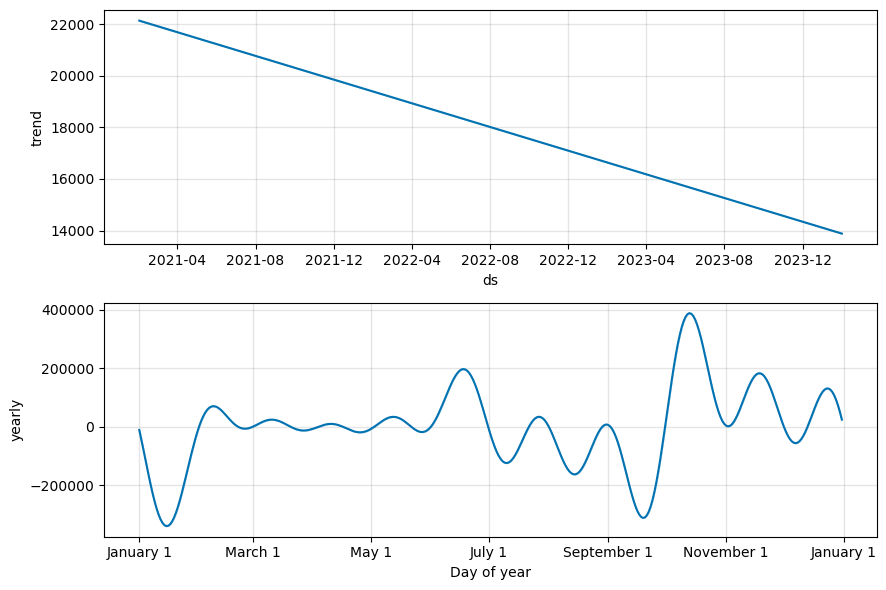

In [8]:
fig2 = model1.plot_components(forecast)

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [10]:
data = pd.read_csv('넙치.csv')

In [11]:
quantity = data['물량-평균'].values
price = data['단가'].values

In [12]:
model = LinearRegression()
model.fit(quantity.reshape(-1, 1), price)

LinearRegression()

In [13]:
print("물량과 가격 분석 결과:")
print("기울기 (회귀 계수):", model.coef_[0])
print("절편 (절편 값):", model.intercept_)

물량과 가격 분석 결과:
기울기 (회귀 계수): -33.185665193506466
절편 (절편 값): 22199.90315952249


In [14]:
future_quantity = 50 # 예측할 물량
predicted_price = model.predict([[future_quantity]])

In [15]:
print("물량에 따른 예측 가격:")
print("물량:", future_quantity)
print("예측 가격:", predicted_price[0])

물량에 따른 예측 가격:
물량: 50
예측 가격: 20540.619899847166
